# **<font color = "red">** **CustomerSegmentation**


   * Fuente : Kaggle

            https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Test.csv




# <font color = "green"> **Descripción de Datos**

Una empresa de automóviles tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5). Después de una intensa investigación de mercado, han deducido que el comportamiento del nuevo mercado es similar al mercado existente.

En su mercado existente, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron actividades de divulgación y comunicación segmentadas para un segmento diferente de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Metas:

* Analizar el grupo de clientes de la empresa.
* Predecir el grupo correcto de nuevos clientes.

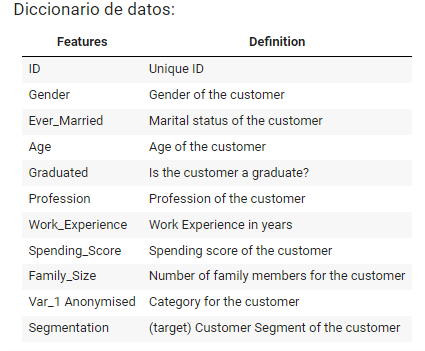

**Actividades que se realizara**

* Gender VS Segmentacion
* Estado civil vs Segmentacion
* Age vs Segmentacion
* Graduated vs Segmentacion
* Profession vs Segmentacion
* Work_experience vs Segmentacion
* Spending_scores vs Segmentacion
* Family_sizes vs Segmentacion
* Var_1 vs Segmentacion
* genero vs Age
* genero vs Profession
* Age vs Work_experience
* Age vs Spending_scores
* Var_1 vs Gender
* Spending_scores vs work_experience
* Gender vs Spending_scores

# <font color="purple"> **Importar Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Vamos a subir el dataset a un github para que se nos haga más facil
df = pd.read_csv("https://raw.githubusercontent.com/sake357/Project_Growth/main/Project_CSV")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
# Para fines de una mejor comprensión se renombraran algunas variables para evitar cualquier confusión
df.rename({"Var_1": "Customer_Category"}, axis = 1, inplace = True) # Lo que se hizo es cambiamos Var_1 a Categoria de Cliente, el axis = 1 es para aplicar a las columnas e inplace es reemplazar True, SI

# <font color="brown"> **Exploración y calidad de datos**

In [4]:
# Para esto tenemos que tener un pequeño resumen de las variables, cantidad de datos y tipos de datos, para esto se utiliza la funcion info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 8068 non-null   int64  
 1   Gender             8068 non-null   object 
 2   Ever_Married       7928 non-null   object 
 3   Age                8068 non-null   int64  
 4   Graduated          7990 non-null   object 
 5   Profession         7944 non-null   object 
 6   Work_Experience    7239 non-null   float64
 7   Spending_Score     8068 non-null   object 
 8   Family_Size        7733 non-null   float64
 9   Customer_Category  7992 non-null   object 
 10  Segmentation       8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


**Como se observa tenemos 7 variables que son tipo object, es decir cadenas.**

**Y tenemos 2 variables que son enteros y 1 flotante es decir decimales.**

Tambien se observa que la variable Family_Size no corresponde al tipo de dato que deberia tener como int y no float.

<font color="blue"> **Resumen Estadistico**

In [5]:
# Variables Numericas
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


A simple vista observamos que el Work_Experience tiene datos outliers a comparación de las otras variables.

In [6]:
# Variables cualitativas
df.describe(include = [object]) # para tener un pequeño resumen de las variables cualitativas es con la misma función solo que en esta añadimos un parametro include = [object]

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Customer_Category,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [7]:
# Eliminamos la columna ID , ya que no es relevante en el proyecto.
df.drop('ID', axis = 1, inplace = True)

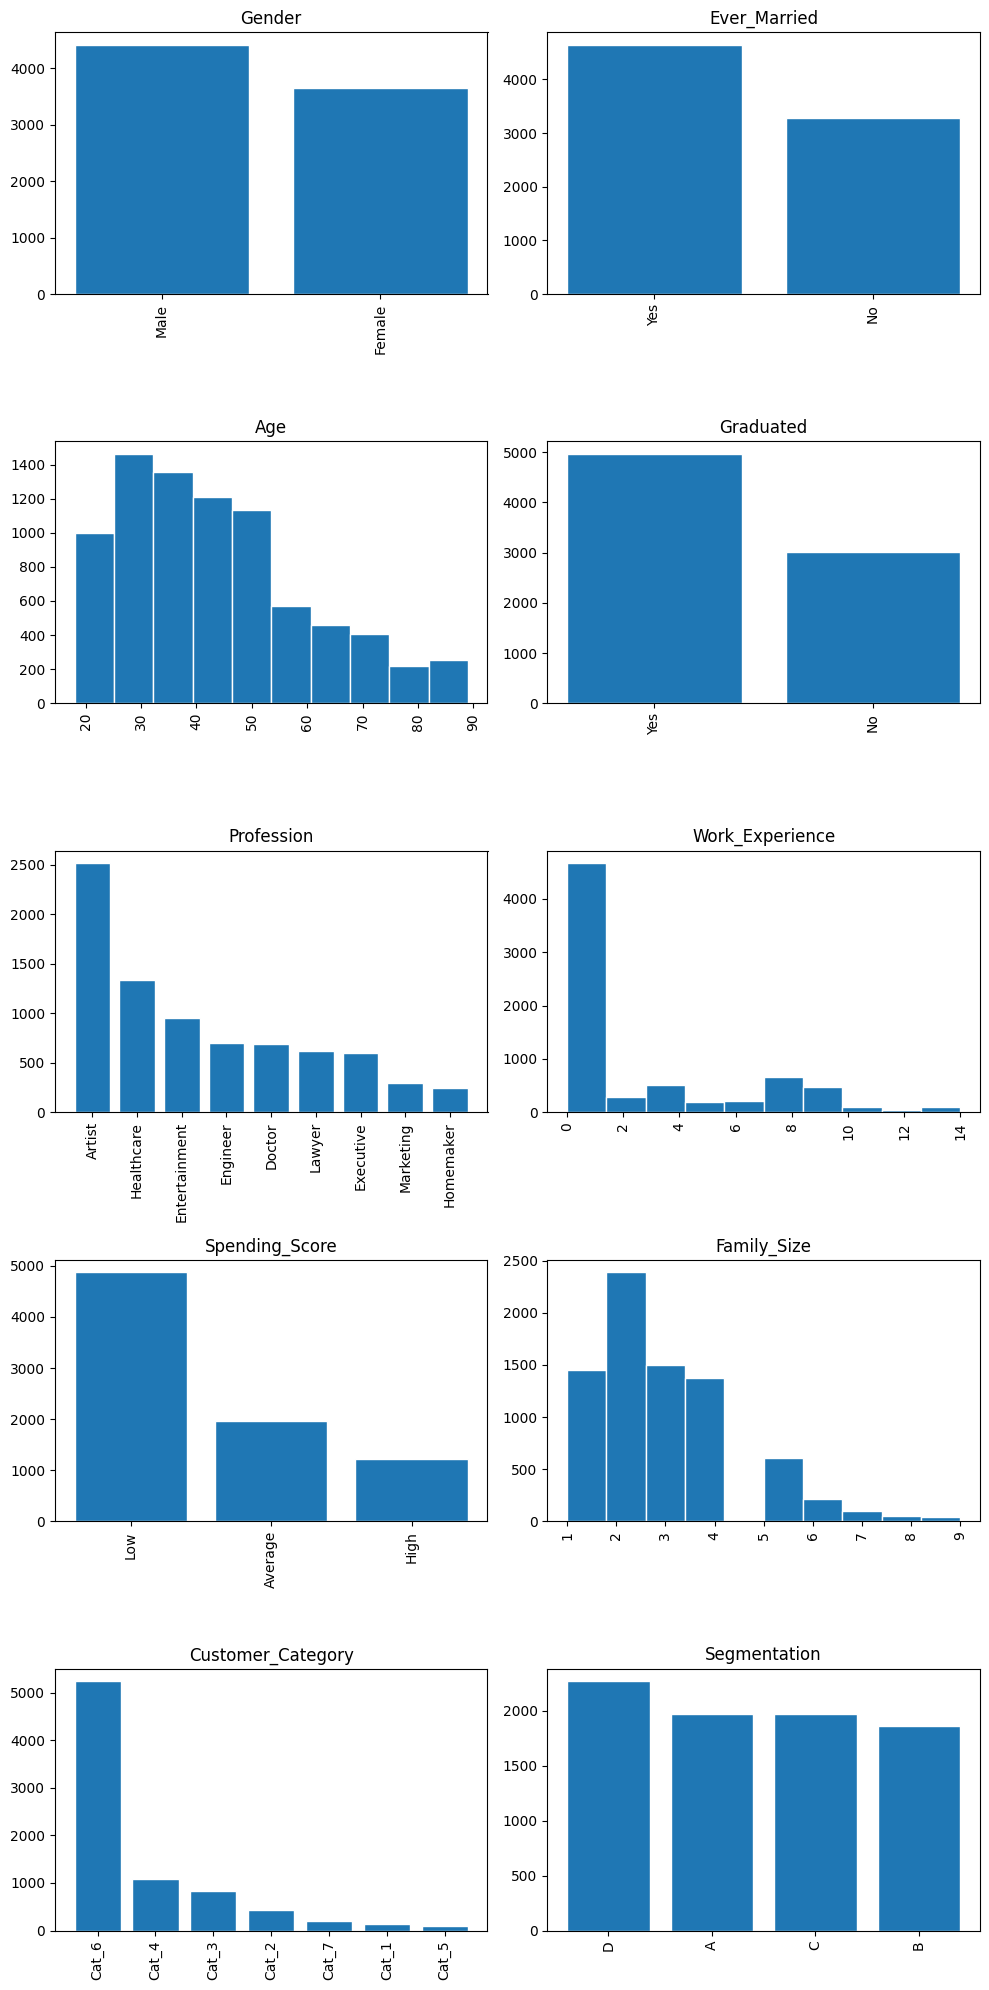

In [8]:
columnas = df.columns

# Calcular el número de filas y columnas en la disposición de subplots
num_filas = 5
num_columnas = 2

# Crear la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 20))

# Aplanar los subplots en un arreglo unidimensional
axs = axs.flatten()

# Iterar sobre las columnas y graficar los histogramas en los subplots correspondientes
for i, columna in enumerate(columnas):
    if df[columna].dtype == 'object':
        # Si es una columna categórica, contar las ocurrencias de cada categoría
        counts = df[columna].value_counts()
        axs[i].bar(counts.index, counts.values, edgecolor='white')
        axs[i].set_title(columna)
    else:
        # Si es una columna numérica, graficar el histograma
        axs[i].hist(df[columna], edgecolor='white')
        axs[i].set_title(columna)
    axs[i].tick_params(axis='x', rotation=90)
# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura con los histogramas
plt.show()

En el cuadro de los graficos podemos observar que tanto para Age como Family_Size tiene asimetria positiva, quiere decir que una distribución con asimetría positiva, la media se desplaza hacia la derecha de la mediana, y la mayor concentración de valores se encuentra en la parte izquierda de la distribución, mientras que hay valores atípicos o extremos en la parte derecha.

# <font color='gold'> **Valores únicos**

In [9]:
for col_name in df.columns:
  print(f'{col_name}:', df[f'{col_name}'].unique())
  print('*'*30)

Gender: ['Male' 'Female']
******************************
Ever_Married: ['No' 'Yes' nan]
******************************
Age: [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
******************************
Graduated: ['No' 'Yes' nan]
******************************
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
******************************
Work_Experience: [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
******************************
Spending_Score: ['Low' 'Average' 'High']
******************************
Family_Size: [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
******************************
Customer_Category: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
******************************
Segmentation: ['D' 'A' 'B' 'C']
************

**Se observa variables binarias y faltantes "nan"**

# <font color='red'> **Identificar los valores nulos**

In [10]:
# Para poder ver cuanto es el porcentaje de valores nulos en cada variable se utiliza
df.isnull().mean()

Gender               0.000000
Ever_Married         0.017353
Age                  0.000000
Graduated            0.009668
Profession           0.015369
Work_Experience      0.102752
Spending_Score       0.000000
Family_Size          0.041522
Customer_Category    0.009420
Segmentation         0.000000
dtype: float64

Observamos que 4 variables : Ever_Married, Graduated, Work_Experience, Family_Size, Customer_Category son lops que tienen valores nulos.

Sin embargo, Work_Experience es que tiene mayor representacion del 10%.

<font color='red'> **Nulos graficamente**

<Axes: >

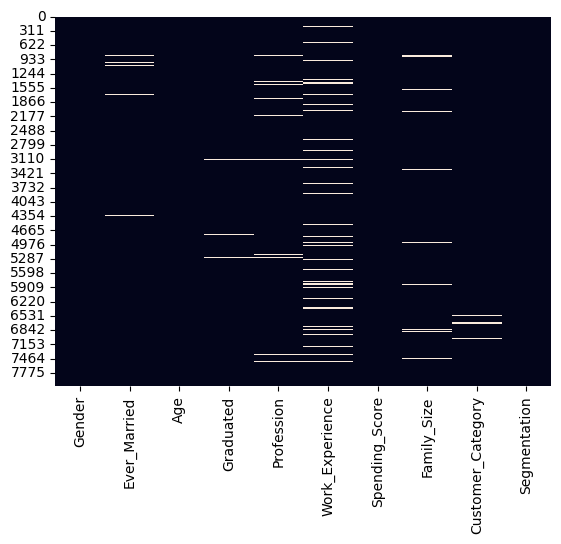

In [11]:
sns.heatmap(df.isnull(), cbar= False) # utilizamos este grafico heatmap, y el cbar lo borrarmos poniendo False ya que no aporta nada al grafico

**En sintesis con todas las variables que tienen nulos se podria imputar, sin embargo en Work_Experience como tiene más del 10% sería mejor eliminarlos a pesar que se eliminaria mas datos o aplicar otro método**

# <font color='green'> **====Limpieza y tratamientos de datos nulos====**

In [12]:
# De la libreria Sklearn del modulo impute importamo KNNImputer que utiliza a datos vecinos del nulo
from sklearn.impute import KNNImputer

# El siguiente paso es separar entre las variables númericas y categoricas
colum_num = df.select_dtypes(include = [np.number]).columns
colum_cat = df.select_dtypes(include = ['object']).columns

# Imputacion de las columnas numericas
imputer = KNNImputer(n_neighbors = 5) # seleccion de la cantidad de vecinos que se utilizara para imputar
df_num_imp = pd.DataFrame(imputer.fit_transform(df[colum_num]),columns = colum_num)

# Combinar columnas numericas imputadas con las columnas categoricas originales
df_imp = pd.concat([df[colum_cat],df_num_imp],axis = 1) # se combina las imputaciones del columnas categ con df numerico imputado, el axis = 1 es para que sea uno al lado de otro y no encima

# Como las columnas categoricas sus nulos son pocos se va a eliminar
df = df_imp.fillna(df_imp.mode().iloc[0])

#Verificamos presencia de nulos
df.isnull().mean()


Gender               0.0
Ever_Married         0.0
Graduated            0.0
Profession           0.0
Spending_Score       0.0
Customer_Category    0.0
Segmentation         0.0
Age                  0.0
Work_Experience      0.0
Family_Size          0.0
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             8068 non-null   object 
 1   Ever_Married       8068 non-null   object 
 2   Graduated          8068 non-null   object 
 3   Profession         8068 non-null   object 
 4   Spending_Score     8068 non-null   object 
 5   Customer_Category  8068 non-null   object 
 6   Segmentation       8068 non-null   object 
 7   Age                8068 non-null   float64
 8   Work_Experience    8068 non-null   float64
 9   Family_Size        8068 non-null   float64
dtypes: float64(3), object(7)
memory usage: 630.4+ KB


Podemos observar que hay variables que en la cual no tiene sentido que sean float sino int

In [14]:
# cambiar tipo de datos de float a int
df['Age'] = df['Age'].astype('int64')
df['Family_Size'] = df['Family_Size'].astype('int64')
df['Work_Experience'] = df['Work_Experience'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             8068 non-null   object
 1   Ever_Married       8068 non-null   object
 2   Graduated          8068 non-null   object
 3   Profession         8068 non-null   object
 4   Spending_Score     8068 non-null   object
 5   Customer_Category  8068 non-null   object
 6   Segmentation       8068 non-null   object
 7   Age                8068 non-null   int64 
 8   Work_Experience    8068 non-null   int64 
 9   Family_Size        8068 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 630.4+ KB


#<font color='green'> **Datos Duplicados**

In [15]:
# Verificar duplicados en el DataFrame completo
duplicados = df.duplicated()

# Contar la cantidad de duplicados
cantidad_duplicados = duplicados.sum()

# Imprimir los datos duplicados
if cantidad_duplicados > 0:
    print(f"Se encontraron {cantidad_duplicados} registros duplicados:")
    print(df[duplicados])
else:
    print("No se encontraron registros duplicados.")


Se encontraron 508 registros duplicados:
      Gender Ever_Married Graduated  Profession Spending_Score  \
319     Male           No        No  Healthcare            Low   
617     Male          Yes        No      Lawyer            Low   
751     Male           No        No  Healthcare            Low   
809     Male          Yes       Yes   Executive           High   
836     Male           No        No  Healthcare            Low   
...      ...          ...       ...         ...            ...   
8014  Female          Yes       Yes      Lawyer           High   
8042  Female          Yes       Yes      Artist        Average   
8055    Male           No        No  Healthcare            Low   
8057    Male          Yes        No      Lawyer            Low   
8065  Female           No       Yes  Healthcare            Low   

     Customer_Category Segmentation  Age  Work_Experience  Family_Size  
319              Cat_6            D   19                0            4  
617              Cat

**Se decide no eliminar los datos duplicados,ya que son 508 dupllicados y representaria mucha perdida de datos**

# <font color='blue'> **Análisis de datos**

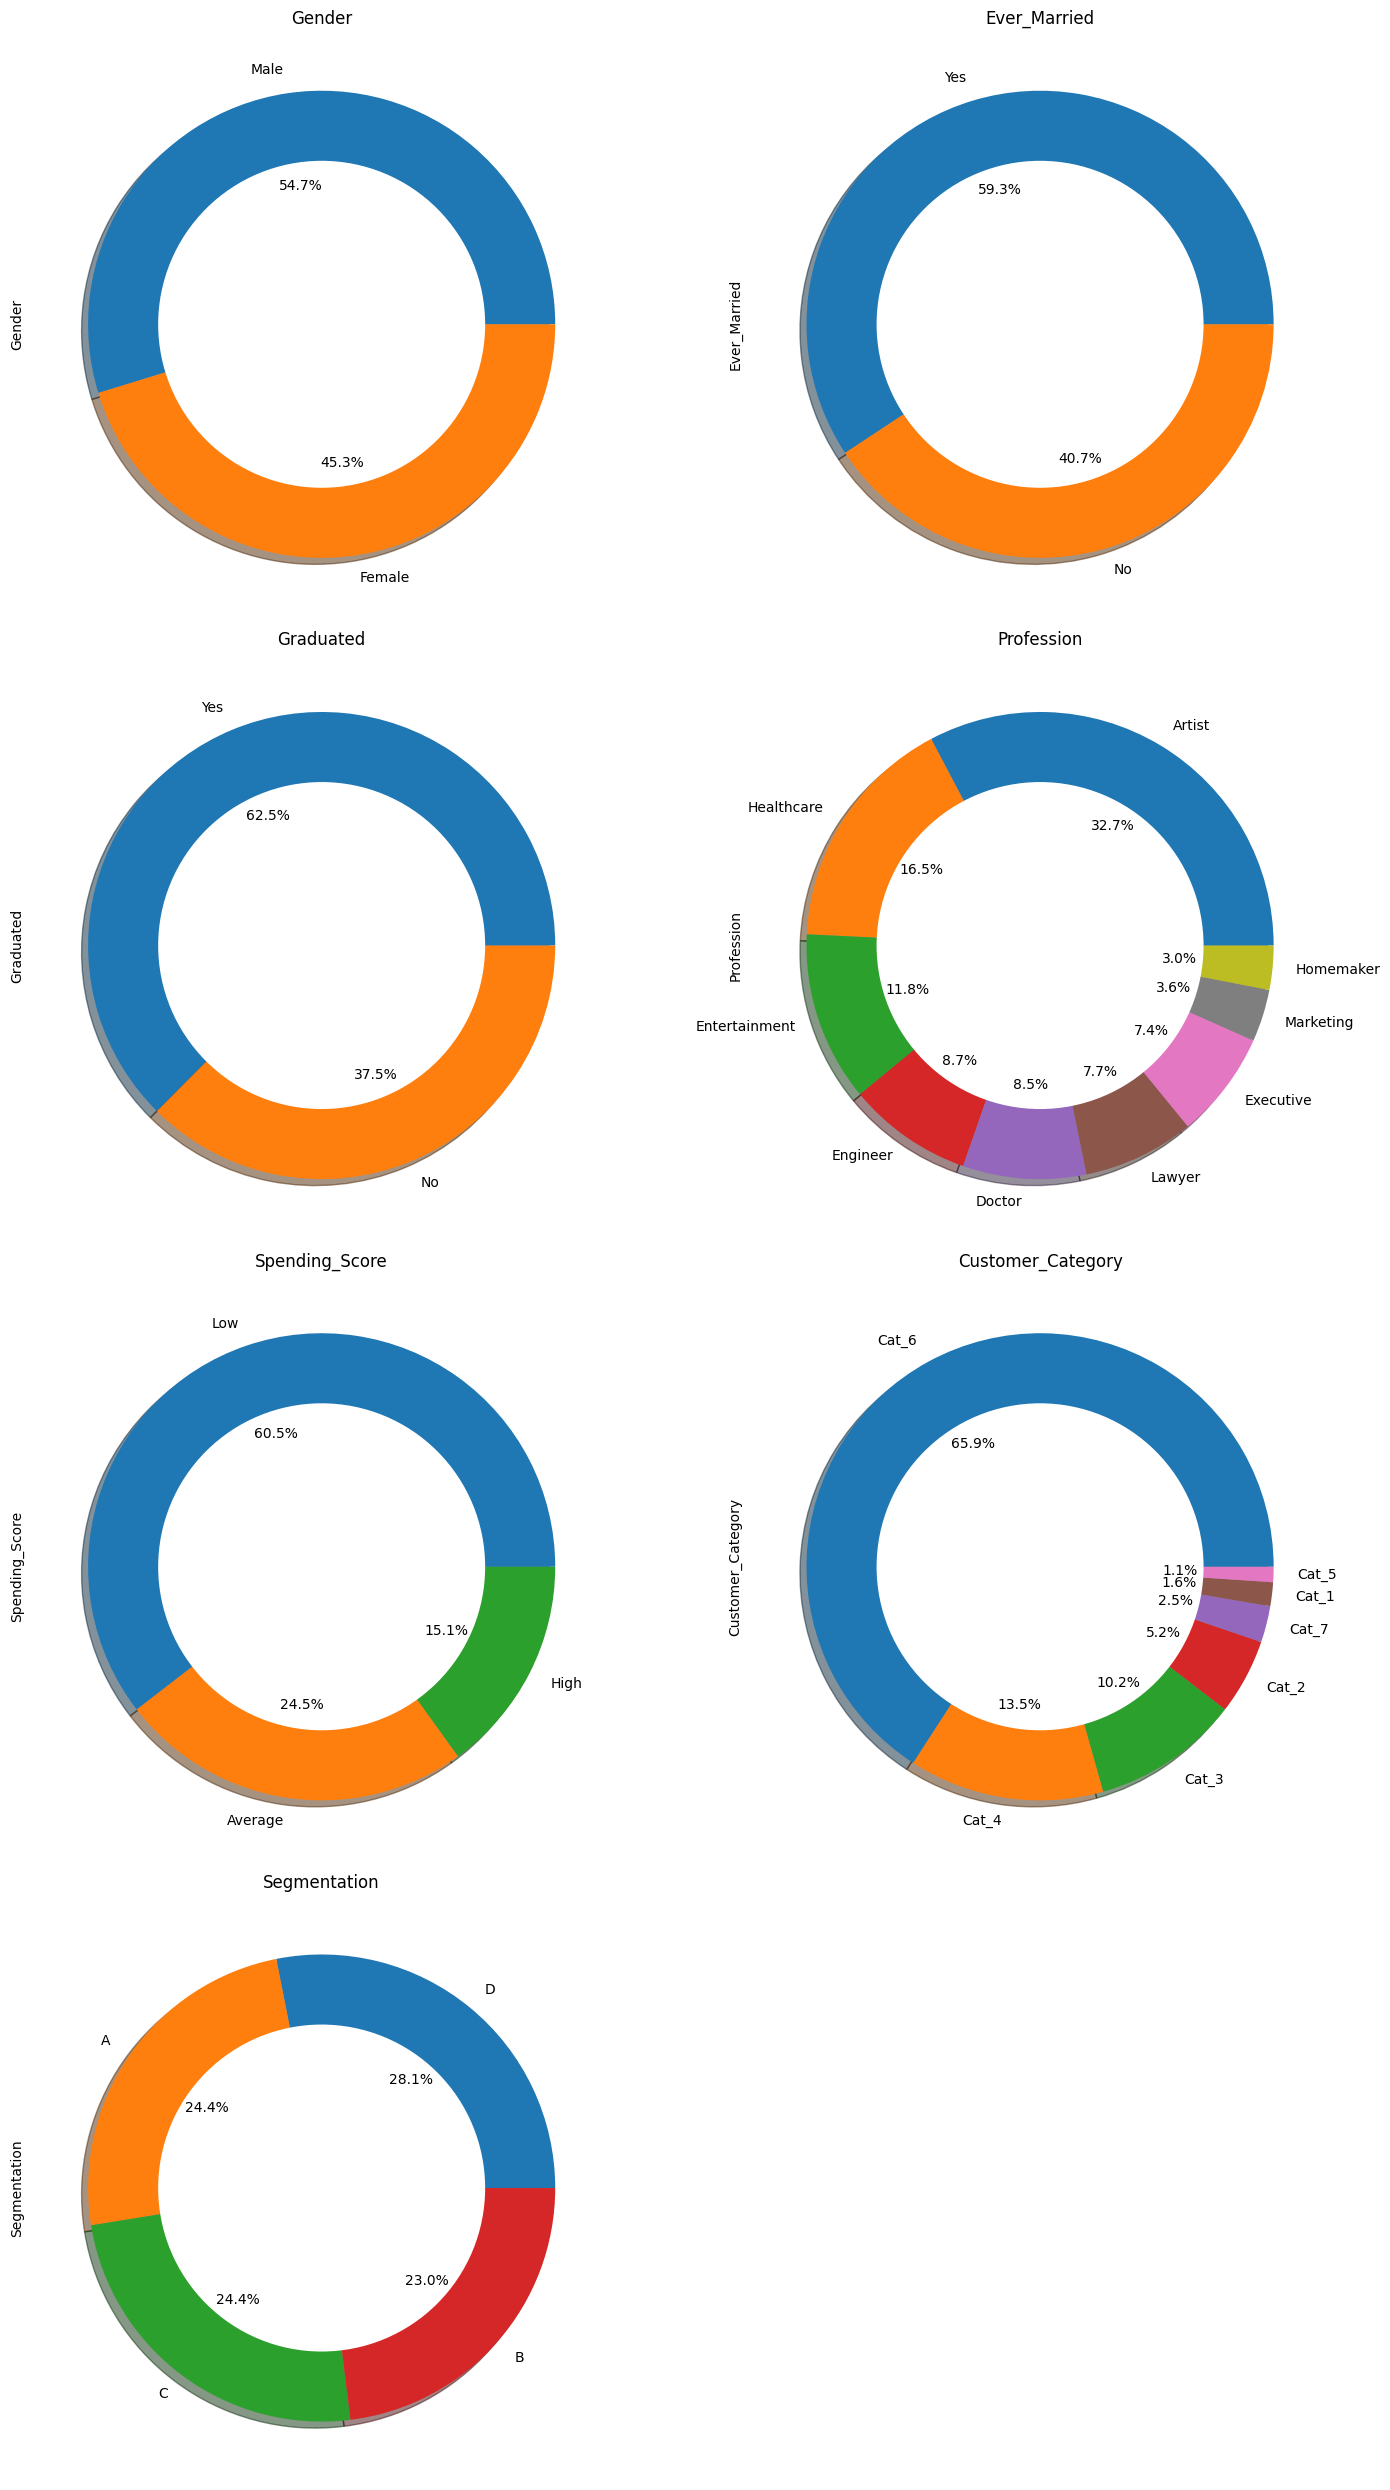

In [16]:
# Creamos una variable que seleccione todos las variables objectos

cat_vars = df.select_dtypes(include=['object']).columns
#Modificamos el tamaño de los graficos
plt.figure(figsize=(15,25))

for i, var in enumerate(cat_vars): # se utiliza un bucle para iterar las variables categoricas
  plt.subplot(4,2,i+1) # asignamos los subplot de 4 filas y 2 columnas el i+1 es para tener una mejor posicion en los graficos
  df[var].value_counts().plot(kind = 'pie', autopct = '%.1f%%', shadow = True) # aqui generamos un grafico utilizando el value_counts(contar) en tipo de grafico circular; el autopct = '%.1f%% muestra el porcentaje
  centre_circle = plt.Circle((0,0),0.70,fc = 'white') # se crea un circulo blanco para que resalte los porcentajes de los datos
  fig = plt.gcf() #Se obtiene la figura creada anteriromente
  fig.gca().add_artist(centre_circle) #Se agrega el circulo blanco anteriormente y se agrega al grafico del pie
  plt.title(var) # Se agrega un titulo del nombre de la variable a cada grafico

plt.tight_layout() #Se ajusta automaticamente los subplots para que se ajustan correctamente
plt.show()

* La mayoria de los clientes son varones con un 54.7%
* El 59.3% de los clientes son casados
* El 62.5% de los clientes son graduados
* Más del 60% de los clientes son profesionales de la salud, artistas y entretenimiento
* EL 60% de los clientes tienen un score de gasto bajo
* Más del 60% de los clientes son de la categoría 6 y menos del 11% de los clientes pertenecen a las categorias 1,2,5 y 7

**Distribucion y boxplot**

In [17]:
# Creamos una funcion para visualizar la distribución de los datos y estadisticos
def show_distrubution(var_data,col_name):
  #tenemos que ya haber importado la liberria matplotlib

  #obtenemos los estadisticos
  min_val = var_data.min() #minimo
  max_val = var_data.max() #maximo
  mean_val = var_data.mean() # media
  med_val = var_data.median() # mediana
  mod_val = var_data.mode()[0] #moda y [0] porque puede haber mas de una moda

  print()

In [18]:
# Función para visualizar la distribucion de los datos y estadisticos
def show_distribution(var_data, col_name):
    #from matplotlib import pyplot as plt

    # Obtener estadísticas
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Imprime los valores estadisticos con su respectivo valor
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Crear un figura para 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plotear el histograma
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency') # eje Y con nombre de Frecuency

    # Agregar líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plotear el boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Agregar título
    fig.suptitle(f'{col_name} Distribution')

    # Mostrar la figura
    fig.show()

Minimum:18.00
Mean:43.47
Median:40.00
Mode:35.00
Maximum:89.00



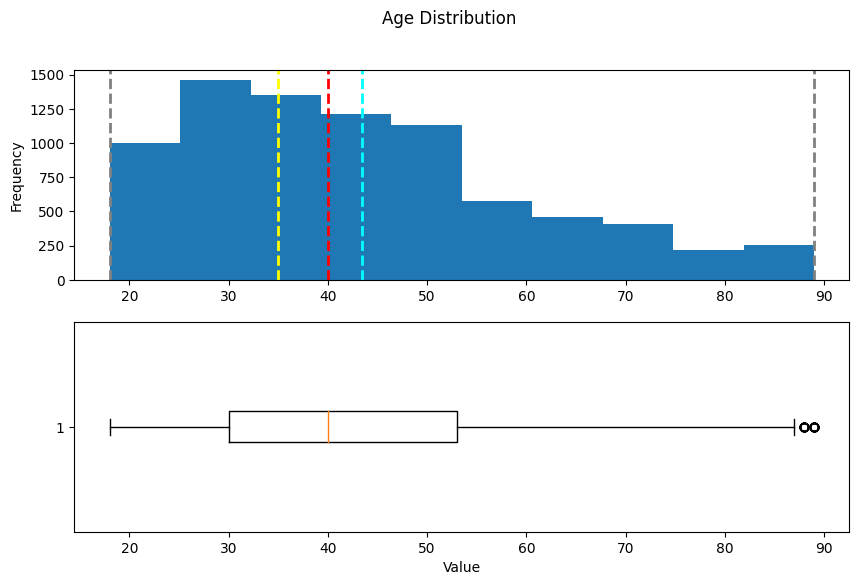

In [19]:
show_distribution(df['Age'],'Age')

* Distribución asimetrica positiva
* La edad media de los clientes es de 43 años
* La mayoria de los clientes tienen entre 30 y 35 años
* También se observa la presencia de outliers

Minimum:1.00
Mean:2.84
Median:3.00
Mode:2.00
Maximum:9.00



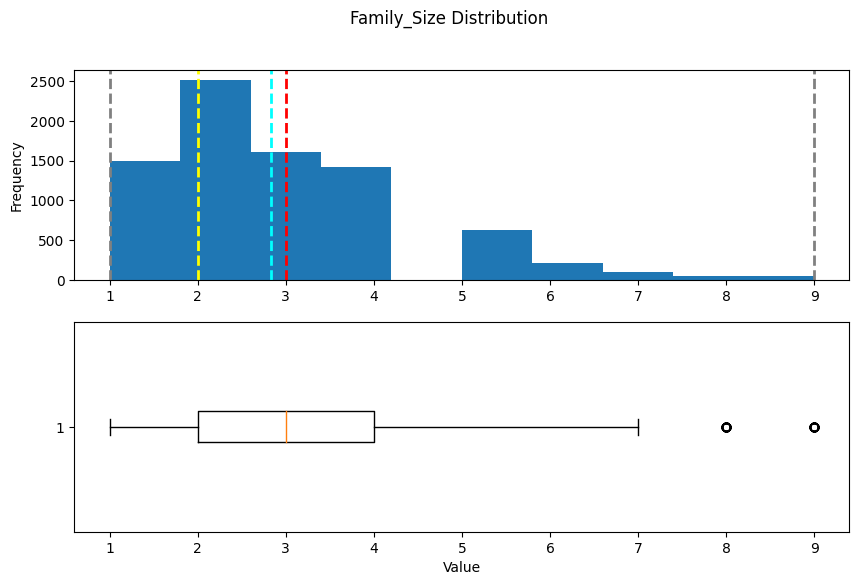

In [20]:
show_distribution(df['Family_Size'],'Family_Size')

* Distribución asimetrica positiva
* La mayoria de los clientes tienen entre 2 a 3 hijos
* Presencia de outliers

Minimum:0.00
Mean:2.59
Median:1.00
Mode:1.00
Maximum:14.00



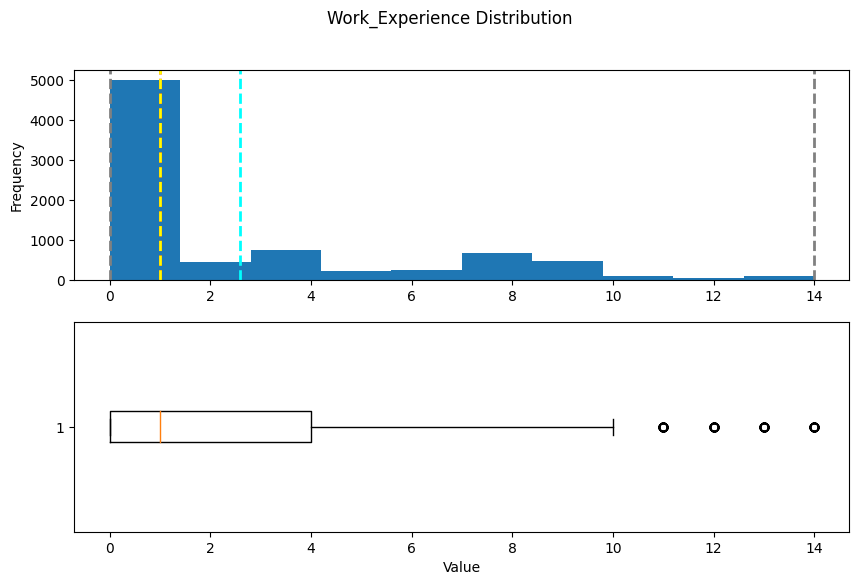

In [21]:
show_distribution(df['Work_Experience'],'Work_Experience')

* Distribución no simétrica positiva
* La mayoria de los clientes tiene entre 1 a 2 años de experiencia.
* Sus clientes son personas que recien estan iniciando en el mundo laboral o juniors
* Se observa la presencia de outliers

#**Task Part 1**

**Genero vs Segmentación**

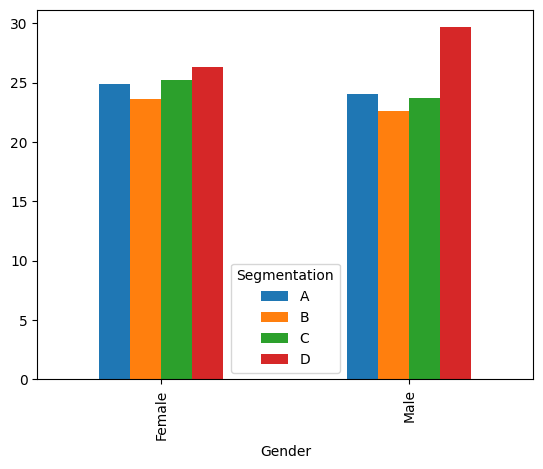

In [22]:
plot = pd.crosstab(index = df["Gender"],
                   columns = df["Segmentation"]).apply(lambda r: r/r.sum()*100,
                                                       axis=1).plot(kind = "bar")
# Se observa que las consumidoras estan posicionadas en una segmentación mas atractivas para  las empresas, en cambio los hombres estan liderando en la segmentacion D

**Estado civil VS Segmentacion**

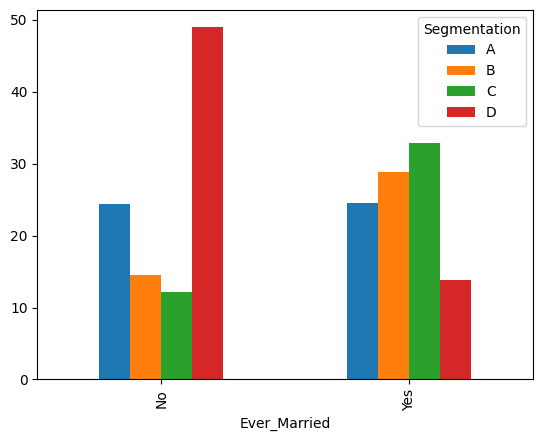

In [23]:
plot = pd.crosstab(index = df['Ever_Married'],
                   columns = df["Segmentation"]).apply(lambda r: r/r.sum()*100,
                                                       axis=1).plot(kind="bar")
# Se puede observar que la segmentación de las personas que alguna vez se casaron estan mejor posicionadas, tanto en el segmento B,C y D, sin embargo en la segmentación A esta igual.
# En cambio las personas que nunca se casaron se clasifican en el segmento menos atractivo para la empresa D, sin embargo tiene casi la misma cantidad del segmento A

**Age vs Segmentacion**

<Axes: xlabel='Segmentation', ylabel='Age'>

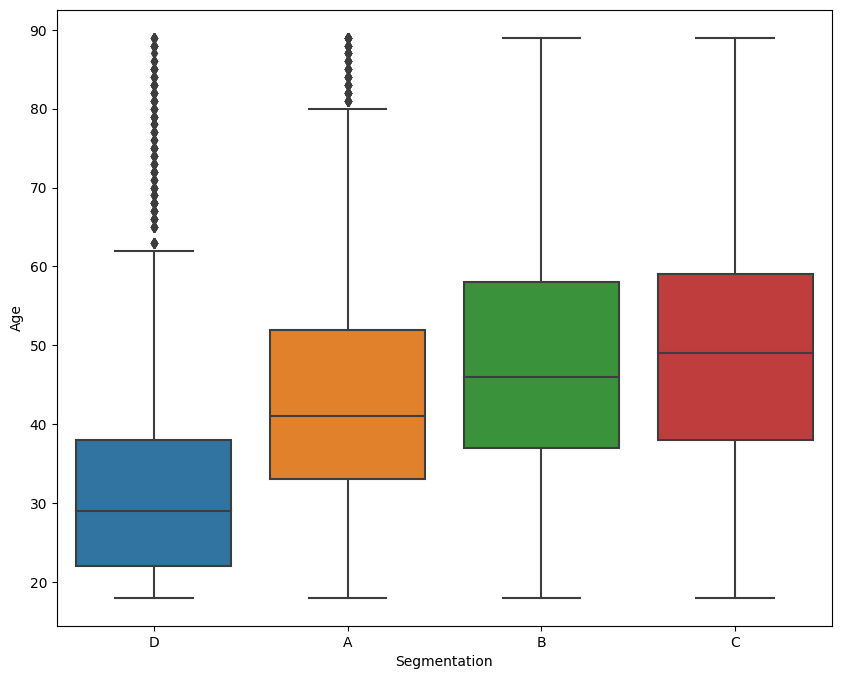

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = "Segmentation", y = "Age")
# En la segmentacion D estan concentrados los consumidores más jovenes que estan dentro del rango 23 a 35 años, en cambio la segmentacion C y B comparten casi
# la misma edad, por su parte en la segmentacion A  su rango de edad de los consumidores estan dentro de 32 a 53 años aprox

**Graduated VS Segmentation**

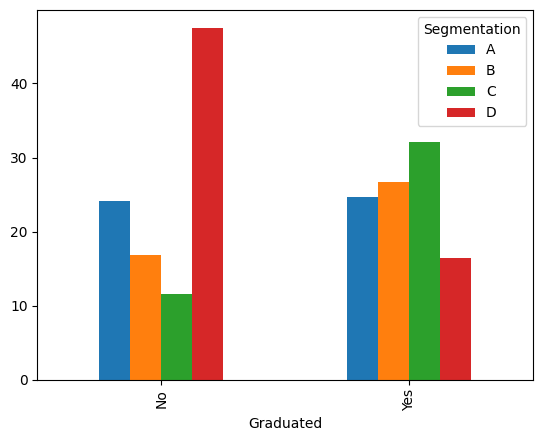

In [25]:
plot = pd.crosstab(index = df["Graduated"],
                   columns = df["Segmentation"]).apply(lambda r:r/r.sum()*100,
                                                       axis = 1).plot(kind = "bar")
# La segmentacion D lideran las personas que no son graduadas, es decir que un consumidor no graduado es muy probable que este en este segmento, sin embargo
# esto no determina que no este en el segmento A, ya que tanto la cantidad de clientes graduados y no  que estan en el segmento A son casi lo mismo, por otro lado , los no
# graduados son los que estan menos presentes en la segmentacion B y C
# Los graduados estan mas equilibrados y son mas atractivos ya que estan mejor posicionados en la segmentaciones A, B  y C.

**Profession VS Segmentation**

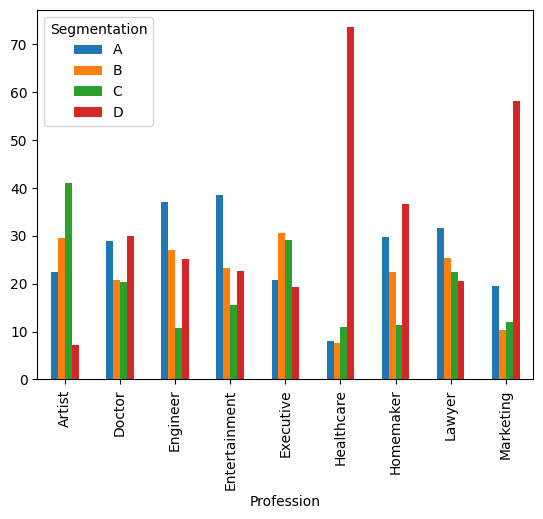

In [26]:
plot = pd.crosstab(index =df["Profession"],
                   columns =df["Segmentation"]).apply(lambda r: r/r.sum()*100,
                                                      axis = 1).plot(kind ="bar")

# Se observa que los consumidores más atractivos para la empresa tienen de profesion son ingenieros, entretenimiento,abogados, doctor y ama de casa
# sin embargo los consumidores que estan posicionados en la segmentacion D seria los de cuidado de salud, marketing, ama de casas

**Año de Experiencia VS Segmentation**

<Axes: xlabel='Segmentation', ylabel='Work_Experience'>

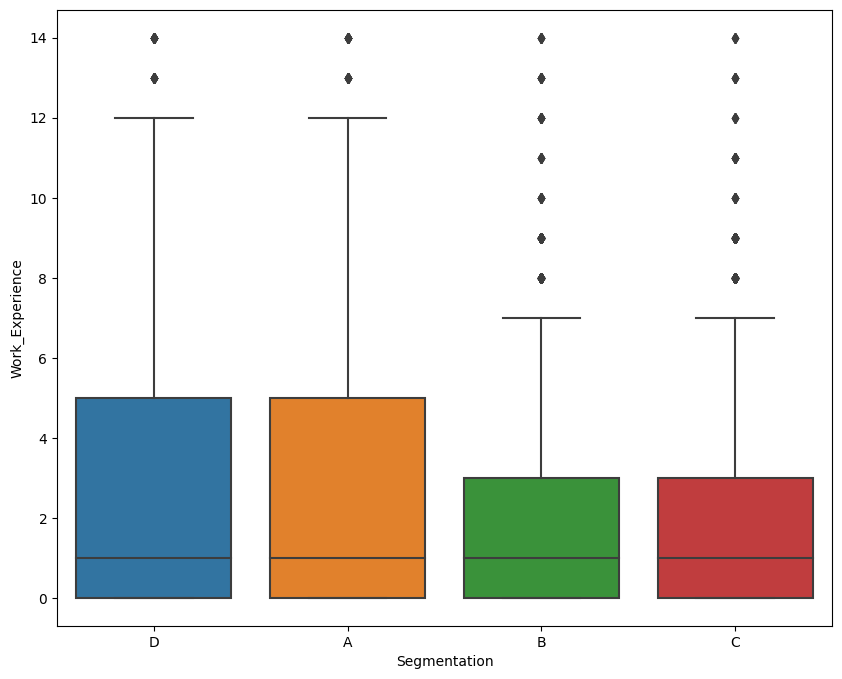

In [27]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x = "Segmentation", y = "Work_Experience")
# Los segmentos D son aquellos que tienen más años de experiencia por lo general que rondan desde 0 hasta los 6
# sin embargo los de segmento C son los que tienen menos años de experiencia que es de 0 a 3 años
# Y los de segmentos B son aquellos que rondan 0 a 3 años
# Los de segmento A no necesariamente son aquellos que tienen más años de experiencia, ya que, los años
# de experiencia de trabajo son de 0 a 5 años.

**Spending_score VS Segmentation**


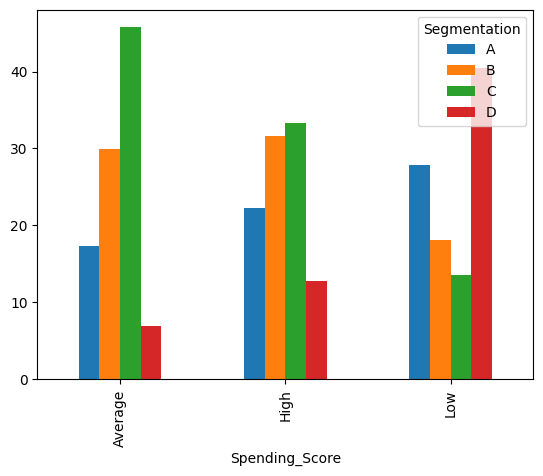

In [28]:
plot = pd.crosstab(index = df["Spending_Score"],
                   columns = df["Segmentation"]).apply(lambda r:r/r.sum()*100,
                                                       axis= 1).plot(kind="bar")
# Se observa que los de bajo Spending lideran el segmento A pero a su vez tambien del SEgmento D,
# por otra parte los de medio spending score son los clientes que lideran los segmentos D, sin embargo los
# alto spending score no lideran el segmento A pero si los segmentos B y C, siendo los más equilibrados.

**Family_sizes VS Segmentation**

<Axes: xlabel='Segmentation', ylabel='Family_Size'>

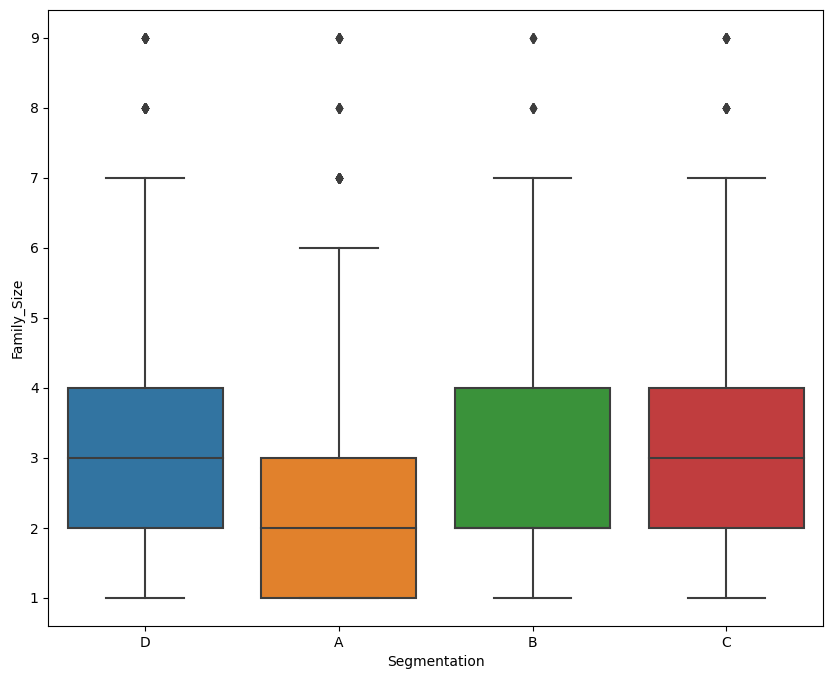

In [29]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x= "Segmentation", y = "Family_Size")
# Se puede observar que los consumidores que se encuentran en el segmento A por lo general son aquellos que las familias la conforman de 1 a 3 maximo, por otra parte los demas
# segmentos son aquellas que en general estan conformados por 2 a 4 miembros.

**Tablas de contingencia**

In [30]:
# Customer_category vs Profession
CC_S=pd.crosstab(index=df['Profession'],
            columns=df['Customer_Category'], margins=True)
CC_S

Customer_Category,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,All
Profession,,,,,,,,
Artist,38,123,223,231,24,1931,70,2640
Doctor,11,43,78,105,4,421,26,688
Engineer,8,23,88,204,9,349,18,699
Entertainment,16,56,125,137,10,583,22,949
Executive,13,20,32,87,2,435,10,599
Healthcare,25,126,146,213,22,756,44,1332
Homemaker,4,13,48,28,6,146,1,246
Lawyer,10,8,29,36,3,536,1,623
Marketing,8,10,53,48,5,157,11,292


* La mayoria de clientes tienden a ubicarse en la categoria 6.
* Hay menor cantidad de clientes profesionales ubicados en las categorias 1,5 y

In [31]:
# Profession vs Gender
pd.crosstab(index=df['Profession'],
            columns=df['Gender'], margins=True)

Gender,Female,Male,All
Profession,,,
Artist,1272,1368,2640
Doctor,304,384,688
Engineer,559,140,699
Entertainment,253,696,949
Executive,32,567,599
Healthcare,557,775,1332
Homemaker,203,43,246
Lawyer,307,316,623
Marketing,164,128,292


* Se tiene mayor cantidad de clientes ejecutivos varones que mujeres.
* Hay mayor cantidad de clientes mujeres amas de casa que varones
* Hay mayor presencia de clientes de ingeniería que varones.

In [32]:
pd.crosstab(index=df['Gender'],
            columns=df['Customer_Category'], margins=True)

Customer_Category,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,All
Gender,,,,,,,,
Female,68,204,386,508,52,2333,100,3651
Male,65,218,436,581,33,2981,103,4417
All,133,422,822,1089,85,5314,203,8068


* Dado que la mayoria de clientes se encuentra en la categoria 6, esto puede indicar que puede haber algun beneficio o puede significar que son los que adquieren en cuotas.

In [33]:
# porcentajes relativos según género
pd.crosstab(index=df['Gender'], columns=df['Spending_Score']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Spending_Score,Average,High,Low
Gender,,,
Female,22.760887,13.420981,63.818132
Male,25.877292,16.436495,57.686212


Se observa que de todas las clientas, el 63.8% se encuentran con score de gasto bajo, lo cual podria significar que la mayoria tiende a ser mas cautelosa.
Se observa que los varones tienden a gastar más que las mujeres.

In [34]:
pd.crosstab(index=df['Family_Size'], columns=df['Spending_Score'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

Spending_Score,Average,High,Low,All
Family_Size,,,,
1,0.136341,0.322261,18.071393,18.529995
2,10.225583,7.411998,13.559742,31.197323
3,5.751116,2.900347,11.341101,19.992563
4,5.391671,2.664849,9.506693,17.563213
5,2.045117,1.103123,4.586019,7.734259
6,0.582548,0.309866,1.735250,2.627665
7,0.173525,0.148736,0.867625,1.189886
8,0.074368,0.074368,0.470997,0.619732
9,0.086763,0.136341,0.322261,0.545364


* Los clientes con score de gasto alto, esta conformado por parejas.
* Los clientes con score bajo lo conforman los que son solteros esto puede ser debido a los pocos años de experiencia o ingreso.

**Graficos Boxplots**

<Axes: title={'center': 'Age'}, xlabel='Gender'>

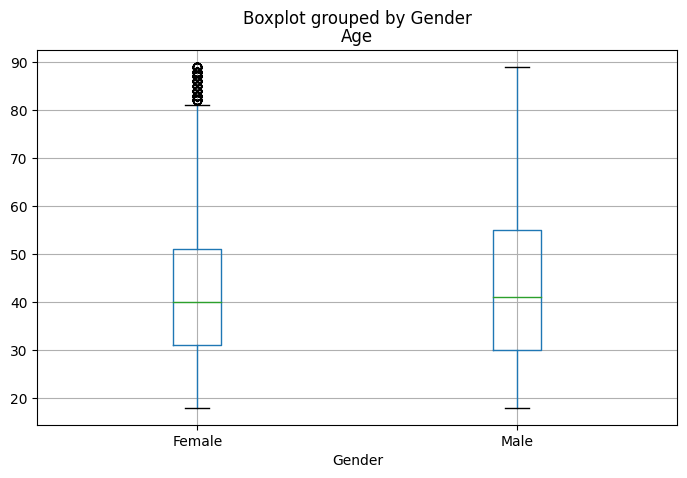

In [35]:
# Age vs gender
df.boxplot(column='Age', by='Gender', figsize=(8,5))

* Los clientes varones se encuentran entre los 20 a 90 años y las mujeres entre los 20 a 80 años.

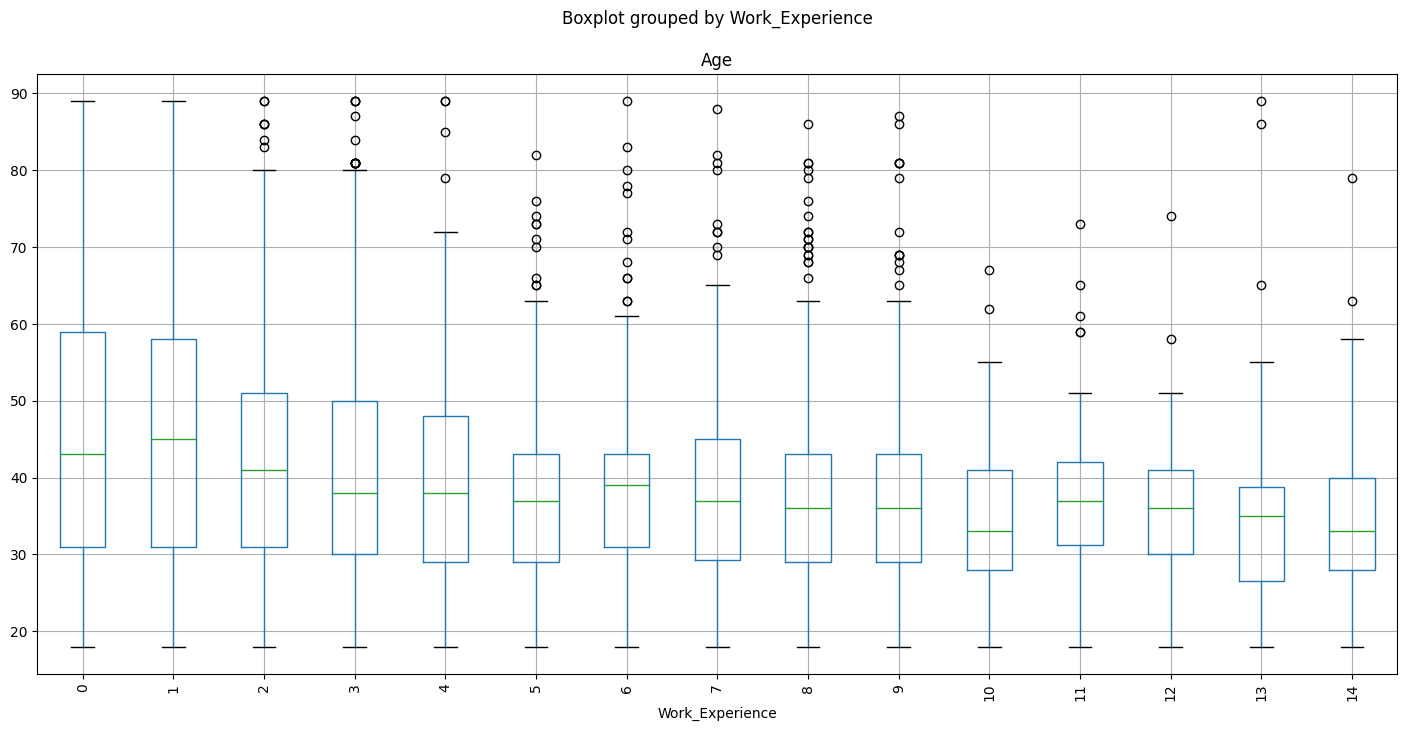

In [36]:
df.boxplot(column='Age', by='Work_Experience', figsize=(17,8))
plt.tick_params(axis='x', rotation=90)

* Se observa que hay clientes entre 50 y 90 años que poseen 2 años de experiencia.
* Muchos de los clientes entre 30 a 45 años tienen entre 2 a 14 años de experiencia, esto puede deberse a que iniciaron a muy temprana edad a trabajar.

<Axes: title={'center': 'Age'}, xlabel='Spending_Score'>

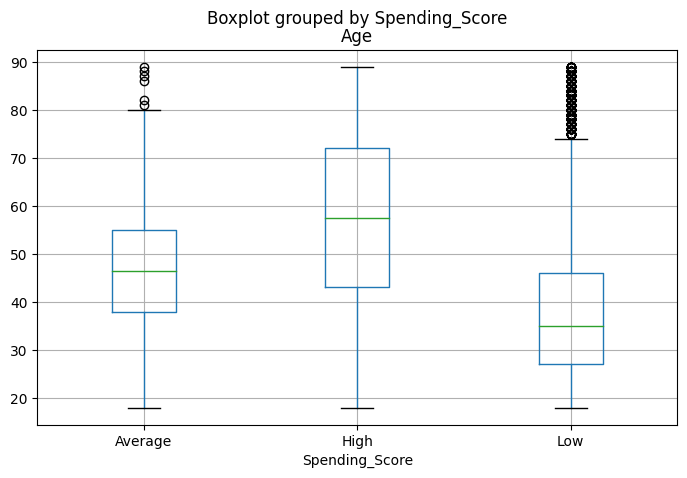

In [37]:
df.boxplot(column='Age', by='Spending_Score', figsize=(8,5))

* Los jovenes son los clientes que inmediatamente buscan un vehiculo pero no tienen mucho dinero para gastar.
* Las personas con edad entre 45 y 70 años son los que realizan gastos muy altos debido a que tienen ahorros o ingresos elevados
* Los de gasto moderaso se enuentran entre 37 a 55 años.

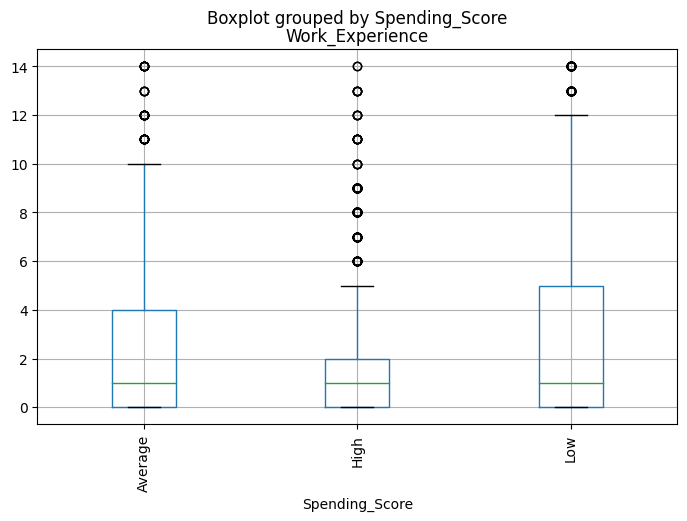

In [38]:
df.boxplot(column='Work_Experience', by='Spending_Score', figsize=(8,5))
plt.tick_params(axis='x', rotation=90)

* Se observa que los que gastan más son las personas que tienen menos experiencia laboral.
* Los que poseen más años de experiencia suelen ser más cautelosos.

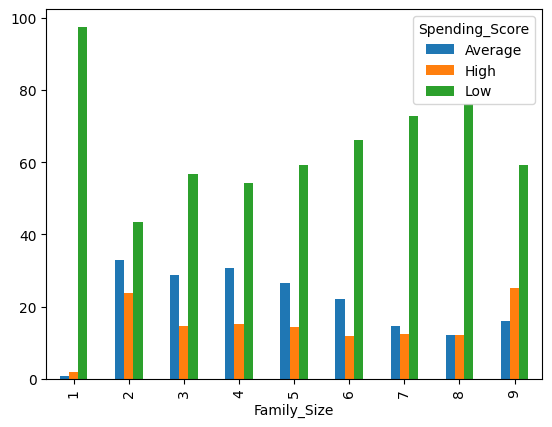

In [39]:
# Gráfico de barras del porcentaje Family_Size segun Spending_Score
plot = pd.crosstab(index=df['Family_Size'],
            columns=df['Spending_Score']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

* A medida que incrementa el númerto de integrantes de una familia, el score de gatos 'bajo' incrementa o que los clientes de score alto y medio pasan a bajo.

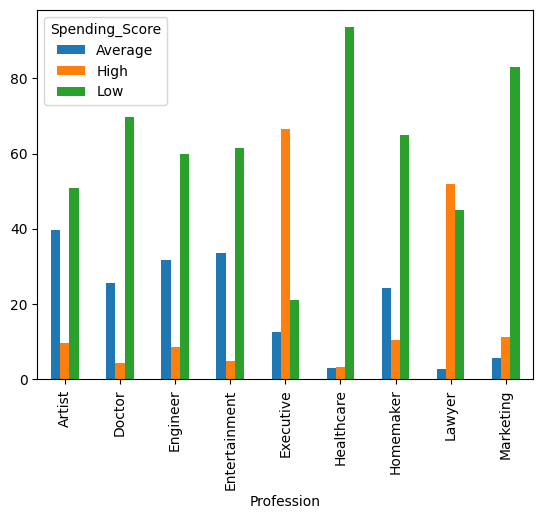

In [40]:
# Gráfico de barras de Spending_Score segun Segmentation
plot = pd.crosstab(index=df['Profession'],
            columns=df['Spending_Score']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

* Se logra observar que los ejecutivos y abogados son los clientes que poseen los score de gasto mas altos, este factor puede ser por su estatus social, etc.

* Los profesionales de la salud son los clientes con un score muy bajo.

* Los artistas, profesionales de salud y los de entretenimiento si bien son una cantidad de clientes que supera el 50%, sin embargo, los ejecutivos y abogados son los clientes que mas gastan, por lo cual se debería de tener en cuenta este público objetivo.

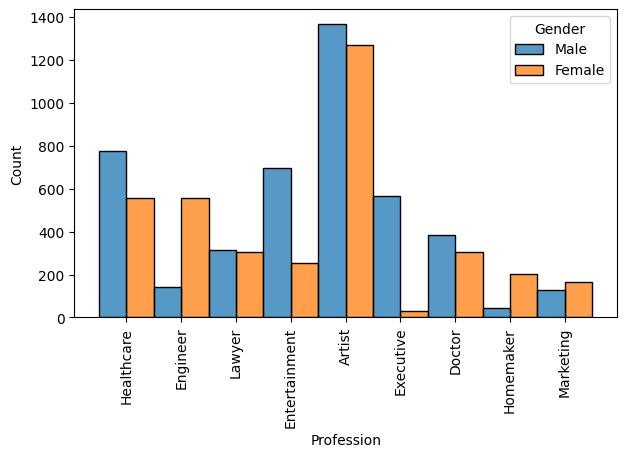

In [41]:
#Distribucion de Profession by Gender
fig, axs = plt.subplots(1, 1, figsize=(7, 4))

axs=sns.histplot(df, x='Profession',hue = 'Gender',multiple="dodge")
axs.tick_params(axis='x', rotation=90)

* La mayoria de los clientes profesionales entre varones y mujeres son artistas.
* Hay mayor cantidad de clientes varones que pertenecen al entretenimiento

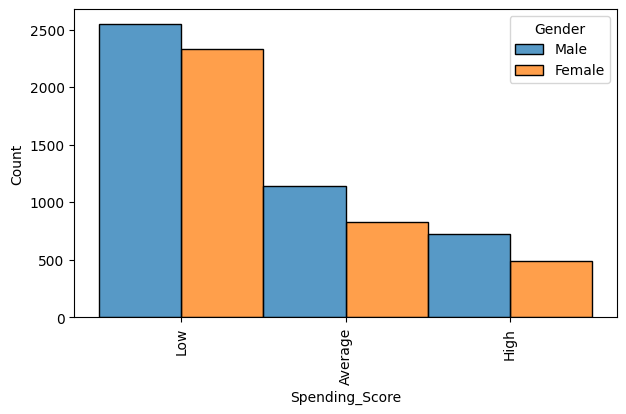

In [42]:
#Distribution of Cat Variables w.r.t Gender
fig, axs = plt.subplots(1, 1, figsize=(7, 4))

axs=sns.histplot(df, x='Spending_Score',hue = 'Gender',multiple="dodge")
axs.tick_params(axis='x', rotation=90)

* Se observa que los clientes que tienen un score de gasto alto son los varones
* Las mujeres son un poco más cautelosas con los gastos

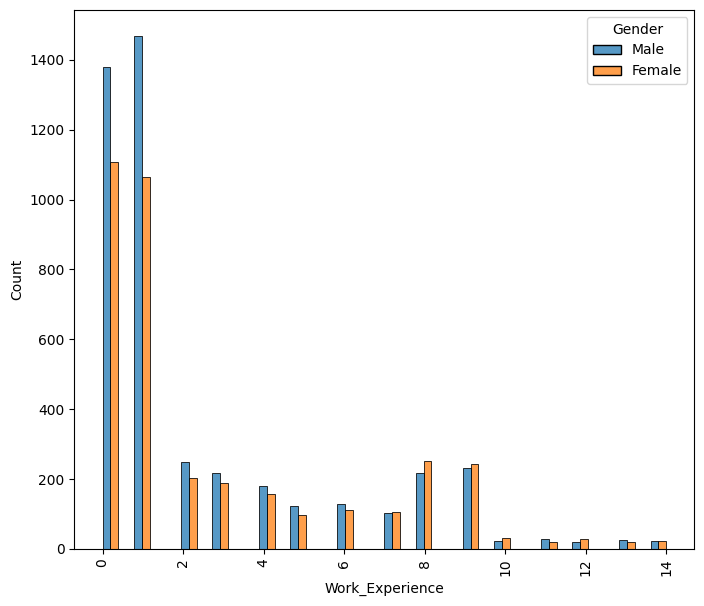

In [43]:
#Distribution of Cat Variables w.r.t Gender
fig, axs = plt.subplots(1, 1, figsize=(8, 7))

axs=sns.histplot(df, x='Work_Experience',hue = 'Gender',multiple="dodge")
axs.tick_params(axis='x', rotation=90)

* Se observa que hay mayor concentracion de clientes con experiencia entre 0 a 1 año.
* A medida que incrementan los años de experiencia, las mujeres son las que resaltan.

#<font color='gold'> **Encodear variables**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             8068 non-null   object
 1   Ever_Married       8068 non-null   object
 2   Graduated          8068 non-null   object
 3   Profession         8068 non-null   object
 4   Spending_Score     8068 non-null   object
 5   Customer_Category  8068 non-null   object
 6   Segmentation       8068 non-null   object
 7   Age                8068 non-null   int64 
 8   Work_Experience    8068 non-null   int64 
 9   Family_Size        8068 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 630.4+ KB


In [45]:
# Convertir las columnas categoricas en columnas codificadas
from sklearn.preprocessing import LabelEncoder # importamos de la libreria sklearn.preprocessing el modulo LabelEncoder
encoder = LabelEncoder() # preparamos la variable de Label.Encoder( )
df2 = df.copy(deep=True)
df2['Gender'] = encoder.fit_transform(df['Gender'])
df2['Ever_Married'] = encoder.fit_transform(df['Ever_Married'])
df2['Graduated'] = encoder.fit_transform(df['Graduated'])
df2['Profession'] = encoder.fit_transform(df['Profession'])
df2['Spending_Score'] = encoder.fit_transform(df['Spending_Score'])
df2['Customer_Category'] = encoder.fit_transform(df['Customer_Category'])
df2['Segmentation'] = encoder.fit_transform(df['Segmentation'])

In [46]:
for col_name in df.columns:
  print(f'{col_name}:',df[f'{col_name}'].unique())
  print('='*35)

Gender: ['Male' 'Female']
Ever_Married: ['No' 'Yes']
Graduated: ['No' 'Yes']
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
Spending_Score: ['Low' 'Average' 'High']
Customer_Category: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
Segmentation: ['D' 'A' 'B' 'C']
Age: [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Work_Experience: [ 1  4  0  7  9 12  3 13  5  8 14  2  6 10 11]
Family_Size: [4 3 1 2 6 5 8 7 9]


In [47]:
for col_name in df2.columns:
  print(f'{col_name}:', df2[f'{col_name}'].unique())
  print('='*30)

Gender: [1 0]
Ever_Married: [0 1]
Graduated: [0 1]
Profession: [5 2 7 3 0 4 1 6 8]
Spending_Score: [2 0 1]
Customer_Category: [3 5 6 2 0 1 4]
Segmentation: [3 0 1 2]
Age: [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Work_Experience: [ 1  4  0  7  9 12  3 13  5  8 14  2  6 10 11]
Family_Size: [4 3 1 2 6 5 8 7 9]


In [48]:
for col_name in df.columns:
  print(f'{col_name}:', df[f'{col_name}'].unique())
  print('*'*30)

Gender: ['Male' 'Female']
******************************
Ever_Married: ['No' 'Yes']
******************************
Graduated: ['No' 'Yes']
******************************
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
******************************
Spending_Score: ['Low' 'Average' 'High']
******************************
Customer_Category: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
******************************
Segmentation: ['D' 'A' 'B' 'C']
******************************
Age: [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
******************************
Work_Experience: [ 1  4  0  7  9 12  3 13  5  8 14  2  6 10 11]
******************************
Family_Size: [4 3 1 2 6 5 8 7 9]
******************************


**Crear matriz de Correlación**

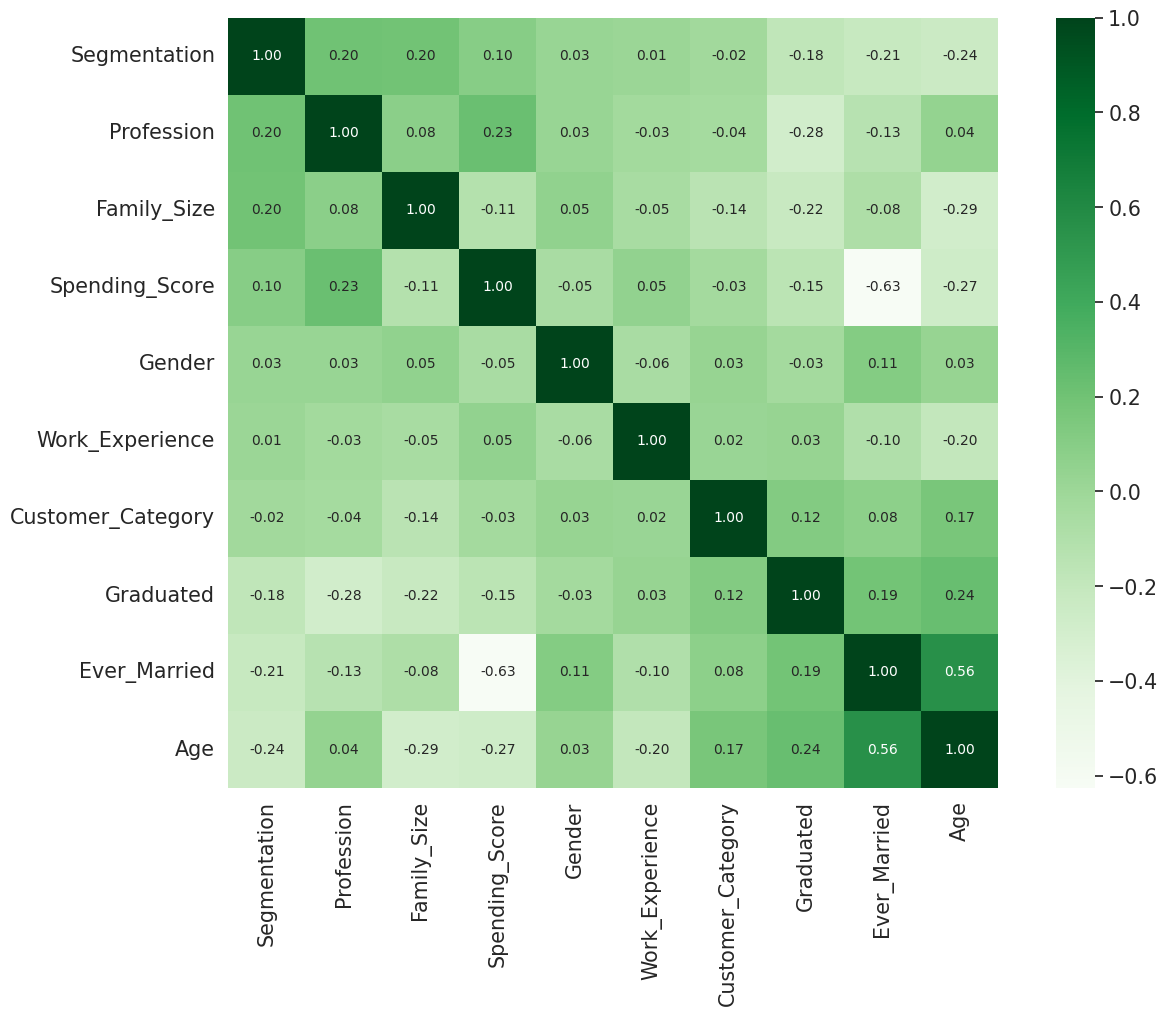

In [49]:
# matriz de correlación
target = 'Segmentation'

len_columns = 10

corr = df2.corr()

columnas = corr.nlargest(len_columns, target)[target].index

plt.figure(figsize=(15, 10))
cm = np.corrcoef(df2[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")

plt.show()

* Existe una relación inversa entre Ever_Married y el Spending_Score, es decir los casados
* Por otro lado existe relacion directa que la edad del consumidor y el Ever_Married, es decir mientras más edad tenga es más probable que el consumidor se haya casado o alguna vez lo haya hecho.
* Con respecto al Target no se evidencia ninguna relación fuerte con las demás variables.

#<font color='red'> **Preparación de datos**

<font color='red'> **Datos Outliers**

<Axes: >

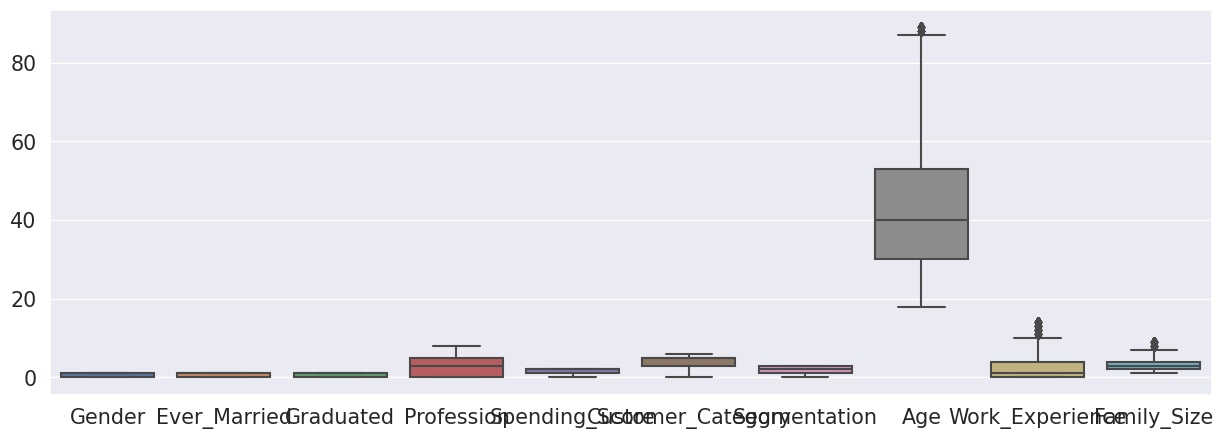

In [50]:
# Verificar datos outliers con los graficos de boxplots
plt.figure(figsize=[15,5])
sns.boxplot(data = df2)

* Como podemos observar existen outliers en 3 variables Age, Work_Experience y Familiy_Size

In [51]:
# Tratamiento de outliers
import scipy.stats as stats

# Encontramos el valor z-score de cada observación
z = np.abs(stats.zscore(df2)) # el zscore es una medida estadistica que en la cual indica cuantas desviaciones estandar tiene un punto de datos con respecto a la media

# Solo mantenemos las filas con puntuación z menor que el valor absoluto de 3
data_clean = df2[(z<3).all(axis=1)]

# Calculamos cuantas filas quedan
data_clean.shape

(7885, 10)

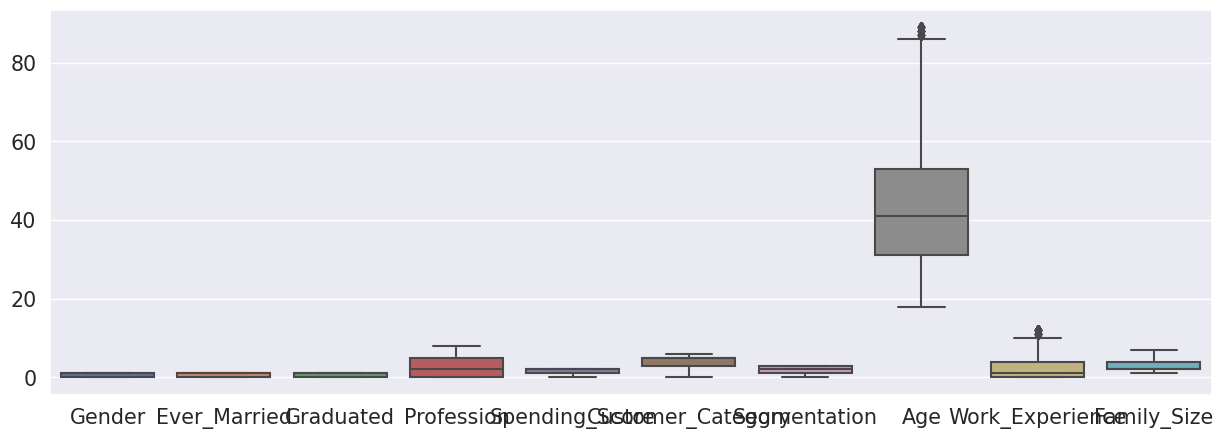

In [52]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = data_clean);

**Se puede observar al aplicar el primer metodo se tiene una disminucion de los outliers, especialmente de Family_Size**

<font color='red'> **Método de rango intercuartílico para eliminar valores atípicos**

In [53]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = df2.quantile(q=.25)
Q3 = df2.quantile(q=.75)
IQR = df2.apply(stats.iqr)

# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
data_clean2 = df2[~((df2 < (Q1-1.5*IQR)) | (df2 > (Q3+1.5*IQR))).any(axis=1)]

# Calculamos cuantas filas desaparecerian
data_clean2.shape

(7720, 10)

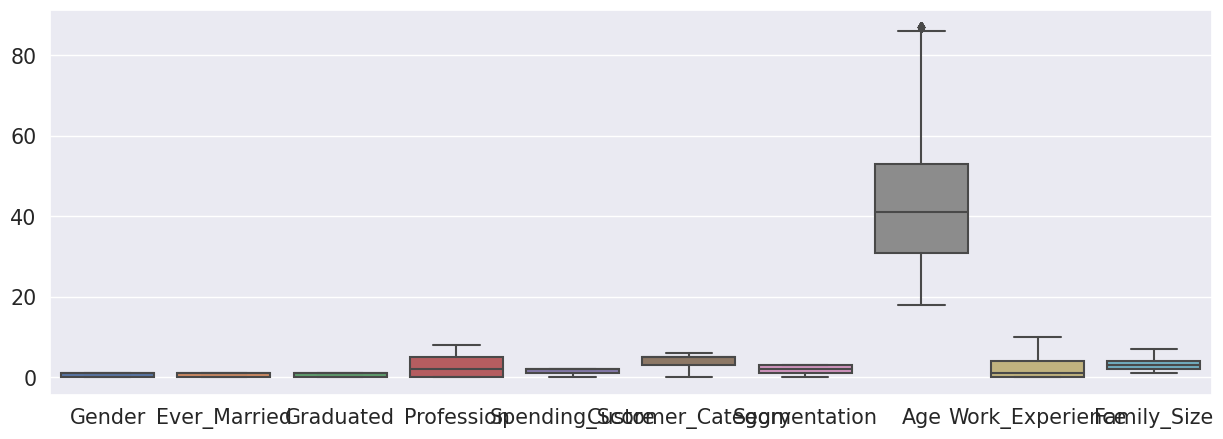

In [54]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = data_clean2);

**Se observó que el método de puntuacion z identificó y eliminó 183 observaciones como outliers, mientras que el método IQR identificó y eliminó 348 observaciones como outliers.**

#<font color='orange'> **Escalar datos**

In [55]:
df2.columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Customer_Category', 'Segmentation', 'Age', 'Work_Experience',
       'Family_Size'],
      dtype='object')

In [56]:
from sklearn.preprocessing import MinMaxScaler

df3 = data_clean2.copy()

scaler = MinMaxScaler()

columnas_a_escalar = ['Age', 'Work_Experience','Family_Size']

df3[columnas_a_escalar] = scaler.fit_transform(df3[columnas_a_escalar])

df3.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Customer_Category,Segmentation,Age,Work_Experience,Family_Size
0,1,0,0,5,2,3,3,0.057971,0.1,0.500000
1,0,1,1,2,0,3,0,0.289855,0.4,0.333333
2,0,1,1,2,2,5,1,0.710145,0.1,0.000000
3,1,1,1,7,1,5,1,0.710145,0.0,0.166667
4,0,1,1,3,1,5,0,0.318841,0.7,0.833333


<font color='red'> **Convertir variables categoricas a numericas**

Se decide cambiar de variables categoricas encodeadas a dummies, porque así se tendria columnas binarias simples de las variables categoricas.

#<font color='purple'> **OJO Al DATO**

**Encodear:**

Nos ayuda en 3 escenarios:

* Analisis Exploratorio: en la distribución y en la relación entre variables categoricas.
* Analísis Estadistico:  se puede utilizar en modelos estadisticos como regresión lineal, ANOVA y otros.
* Algoritmo de aprendizaje automatico:  Arboles de decisión.

**Variables dummies:**

Nos ayuda en 3 escenarios:

* Analisis de regresión: Lineal o Logistica  cuando se tienen variables categóricas como predictores. Esto permite capturar las relaciones no lineales o no monótonas entre las categorías y la variable objetivo.
* Modelo al aprendizaje automático: regresión logística, SVM y redes neuronales, requieren variables numéricas como entrada. En estos casos, la creación de variables dummy es útil para representar adecuadamente las variables categóricas en el modelo.
* Cluster :  las variables dummy se pueden utilizar para identificar patrones o grupos de observaciones similares basados en categorías categóricas.

**En sintesis se va aplicar columnas binarias simples cuando sean columnas cualtativas que no tengan una jerarquia, en cambio si existe jerarquia sera suficiente con encodear las variables cualitativas**

In [57]:
columnas_convertir = ['Profession','Spending_Score','Customer_Category']
df3 = pd.get_dummies(data = df2, columns = columnas_convertir, drop_first = True)
df3.head()

,Gender,Ever_Married,Graduated,Segmentation,Age,Work_Experience,Family_Size,Profession_1,Profession_2,Profession_3,...,Profession_7,Profession_8,Spending_Score_1,Spending_Score_2,Customer_Category_1,Customer_Category_2,Customer_Category_3,Customer_Category_4,Customer_Category_5,Customer_Category_6
0,1,0,0,3,22,1,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,1,0,38,4,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,1,67,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,67,0,2,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0,1,1,0,40,7,6,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [58]:
# Exportar el dataset a CSV
df3.to_csv('dataset_cleaned.csv',index=False)

#**Split Data**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Separamos los datos --------------
X = df3.drop('Segmentation',axis = 1)
y = df3['Segmentation']
# Separacion de la data para que sean el train que entrena el modelo y test para validarlo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [60]:
from sklearn.neighbors import KNeighborsClassifier    # KNN
from sklearn.ensemble import RandomForestClassifier   # RANDOM FOREST
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression   # Regresion logistica
from sklearn.metrics import confusion_matrix          # metricas
from sklearn.metrics import precision_score           # precisión
from sklearn.metrics import classification_report

Clasificadores:

KNeighborsClassifier (KNN):

El clasificador K vecinos más cercanos (K Nearest Neighbors, KNN) es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación. Dado un conjunto de datos etiquetados, clasifica una nueva instancia según la mayoría de las etiquetas de sus vecinos más cercanos en el espacio de características.
El clasificador KNN se utiliza para realizar tareas de clasificación basadas en la similitud entre las características de los datos.
Puedes utilizar este clasificador llamando a KNeighborsClassifier().

RandomForestClassifier (Bosques Aleatorios):

El clasificador de Bosques Aleatorios (Random Forest) es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación. Combina múltiples árboles de decisión (un conjunto llamado bosque) para tomar decisiones finales de clasificación.
Los Bosques Aleatorios se utilizan para problemas de clasificación y tienen la ventaja de manejar características numéricas y categóricas, además de ser resistentes al sobreajuste.
Puedes utilizar este clasificador llamando a RandomForestClassifier().

GaussianNB:

GaussianNB es un clasificador Bayesiano ingenuo que se basa en el Teorema de Bayes y asume una distribución gaussiana para las características.
Este clasificador se utiliza para problemas de clasificación y es particularmente adecuado para conjuntos de datos grandes y con características continuas.
Puedes utilizar este clasificador llamando a GaussianNB().

LogisticRegression (Regresión Logística):

La Regresión Logística es un modelo de aprendizaje supervisado utilizado para problemas de clasificación. Estima la probabilidad de que una instancia pertenezca a una determinada clase utilizando una función logística.
Es un modelo lineal y se utiliza ampliamente en problemas de clasificación binaria y multiclase.
Puedes utilizar este clasificador llamando a LogisticRegression().

Métricas:

confusion_matrix:

La matriz de confusión es una métrica de evaluación para problemas de clasificación que muestra el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
Esta métrica ayuda a evaluar la calidad de un modelo de clasificación y permite comprender qué tipo de errores está cometiendo el modelo.
Puedes utilizar esta métrica llamando a confusion_matrix().

precision_score:

La precisión es una métrica de evaluación para problemas de clasificación que mide la proporción de instancias clasificadas como positivas que son realmente positivas.
Es útil cuando el énfasis está en minimizar los falsos positivos.
Puedes utilizar esta métrica llamando a precision_score().

classification_report:

El informe de clasificación es una métrica de evaluación que proporciona un resumen de varias métricas para cada clase en un problema de clasificación.
Incluye la precisión, la recuperación (recall), la puntuación F1 y el soporte (número de muestras) para cada clase.


El informe de clasificación es útil para tener una visión general del rendimiento del clasificador en términos de precisión, recuperación y puntuación F1 para cada clase.
Puedes utilizar esta métrica llamando a classification_report().
Estas importaciones proporcionan acceso a diferentes clasificadores que se pueden utilizar para entrenar modelos de clasificación en scikit-learn. Además, las métricas importadas permiten evaluar el rendimiento de los modelos mediante la matriz de confusión, la precisión y el informe de clasificación. Estas métricas son fundamentales para comprender cómo se está desempeñando un modelo de clasificación y si está cumpliendo con los objetivos deseados en términos de precisión y capacidad de predicción.

#**Modelo de Clasificación de KNN**

In [61]:
clasificador_knn = KNeighborsClassifier(n_neighbors=7) #  se realiza el clasificador de los Kvecinos y se utiliza el parametro 7 vecinos,es decir se utiliza 7 vecinos para realizar las clasificaciones.
clasificador_knn.fit(X_train, y_train) # se entrena el modelo en los datos de entrenamiento de X e Y

y_pred1 = clasificador_knn.predict(X_test) # Se realiza las predicciones del modelo empleando a la data X_test

matriz1 = confusion_matrix(y_test, y_pred1) # Se crea la matriz de confusion comparando el y_test con la data predicha
print(matriz1,'\n')
print(classification_report(y_test, y_pred1)) # Se impime el reporte de test e y_pred

[[166 105  95  60]
 [ 93  98 133  36]
 [ 47  91 195  34]
 [105  61  44 251]] 

              precision    recall  f1-score   support

           0       0.40      0.39      0.40       426
           1       0.28      0.27      0.27       360
           2       0.42      0.53      0.47       367
           3       0.66      0.54      0.60       461

    accuracy                           0.44      1614
   macro avg       0.44      0.43      0.43      1614
weighted avg       0.45      0.44      0.44      1614



**Modificar hiperparametros de KNN**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definimos nuestros hiperparametros en este caso es 2, # de vecinos y el peso que se les da
parametros_knn = {
    'n_neighbors': [3,5,7,15], # Numero de vecinos que se utilizara
    'weights' : ['uniform','distance'],
    'metrics' : ['minkowski'],
    'p' : [1,2],
}

# Creamos el clasificador KNN :
clasificador_knn = KNeighborsClassifier()

# Realizamos la busqueda para encontrar los mejores hiperparametros :
grid_knn = GridSearchCV(clasificador_knn, parametros_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# Obtenemos el mejor clasificador con el mejor hiperparametro:
mejor_clasificador_knn = grid_knn.best_estimator_
mejor_hiperparametro_knn = grid_knn.best_params_

# Realizar predicciones con el mejor clasificador
y_pred_knn = mejor_clasificador_knn.predict(X_test)

#Creamos la matriz de confusion
matriz1 = confusion_matrix(y_test, y_pred_knn) # Se crea la matriz de confusion comparando el y_test con la data predicha
print(matriz1,'\n')
print(classification_report(y_test, y_pred_knn))

[[138  80  81  62]
 [ 86 103 141  38]
 [ 55  85 218  51]
 [102  41  50 283]] 

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       361
           1       0.33      0.28      0.30       368
           2       0.44      0.53      0.48       409
           3       0.65      0.59      0.62       476

    accuracy                           0.46      1614
   macro avg       0.45      0.45      0.45      1614
weighted avg       0.46      0.46      0.46      1614



#<font color='blue'> **Modelo Random_Forest**

In [63]:
clasificador_rf = RandomForestClassifier(n_estimators=500) # Se crea 200 arboles para la toma de decision
clasificador_rf.fit(X_train, y_train) # se entrena el modelo con la data X_train e y_train

y_pred2 = clasificador_rf.predict(X_test) # se predice con la data X_test
matriz2 = confusion_matrix(y_test, y_pred2) # Se crea la matriz comparando el y_test  e y_pred2
print(matriz2,'\n')
print(classification_report(y_test, y_pred2))

[[157  86  44  74]
 [ 99 118  98  53]
 [ 58  92 210  49]
 [108  44  25 299]] 

              precision    recall  f1-score   support

           0       0.37      0.43      0.40       361
           1       0.35      0.32      0.33       368
           2       0.56      0.51      0.53       409
           3       0.63      0.63      0.63       476

    accuracy                           0.49      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.49      0.49      0.49      1614



**Modificar hiperparametros de Random Forest**

* **max_depth:** Controla la profundidad máxima de los árboles en el bosque. Si deseas limitar la complejidad del modelo y evitar el sobreajuste, podrías establecer un valor para max_depth. Por ejemplo, max_depth=10 limitaría la profundidad de los árboles a 10 niveles.

* **min_samples_split**: Define el número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto puede evitar divisiones que generen regiones con muy pocas muestras y ayudar a evitar el sobreajuste. Por ejemplo, min_samples_split=5 requeriría al menos 5 muestras para dividir un nodo interno.

* **min_samples_leaf:** Establece el número mínimo de muestras requeridas para estar en una hoja. Un valor más alto puede evitar particiones excesivas y controlar la profundidad de los árboles. Por ejemplo, min_samples_leaf=2 requeriría al menos 2 muestras en cada hoja.

* **max_features:** Define el número máximo de características a considerar al buscar la mejor división en cada nodo. Puedes establecer un valor específico o usar una proporción de las características totales. Por ejemplo, max_features='sqrt' utilizaría la raíz cuadrada del número total de características.

* **criterion:** Especifica la función para medir la calidad de una división en un árbol. Los dos criterios más comunes son "gini" y "entropy". El valor predeterminado es "gini". Puedes probar diferentes criterios para ver cuál funciona mejor con tus datos.

* **min_impurity_decrease:** Especifica el umbral mínimo para considerar una división. Una división solo se realizará si resulta en una disminución de la impureza mayor o igual a este valor. Ajustar este hiperparámetro puede influir en la complejidad y la estructura del árbol.

* **bootstrap:** Indica si se debe realizar muestreo bootstrap al construir los árboles. El muestreo bootstrap implica tomar muestras con reemplazo de los datos de entrenamiento. El valor predeterminado es True, lo que significa que se realiza el muestreo bootstrap. Puedes probar estableciéndolo en False para desactivar el muestreo bootstrap.

* **random_state:** Controla la semilla utilizada por el generador de números aleatorios para la selección aleatoria de características y muestras. Al establecer un valor específico para random_state, puedes garantizar la reproducibilidad de los resultados.

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # modulo que nos ayuda a elegir los mejores hiperparametros dentro de una lista

# Definimos nuestro hiperparametros
parametros_rf  = {
    'n_estimators': [350,450,550], # Numero de arboles que se creara en el bosque aleatorio, un numero mayor puede mejorar el modelo pero aumentaria el uso de recusos computacional.
    'max_depth': [None,5,10], # Controla la profundida de los arboles en el bosque, si es muy mayor el valor podría ser más complicado el modelo y llegaria a un sobreajuste.
    'min_samples_split': [2,5,10] # Definimos el número minimo de muestras para dividir un nodo interno.
}

# Creamos el clasificador RandomForestClassifier
clasificador_rf = RandomForestClassifier()

# Se realiza la busqueda de los mejores hiperparametros
grid_rf = GridSearchCV(clasificador_rf, parametros_rf, cv = 5) # El CV es validacion cruzada que en la cual, los datos se dividen en k partes que se entrena y evalua el modelo en k veces, utilizando una parte diferente como conjunto de prueba y el resto como entrenamiento
grid_rf.fit(X_train, y_train)

# Obtenemos el mejor clasificador y los mejores hiperparametros
mejor_clasificador_rf = grid_rf.best_estimator_
mejor_hiperparametro_rf = grid_rf.best_params_

# Realizar predicciones con el mejor clasificador
y_pred_rf = mejor_clasificador_rf.predict(X_test)

**Realizamos la matriz de confusion de la nueva RandomForestClassifier con lkos hiperparametros**

In [65]:
matriz_rf = confusion_matrix(y_test, y_pred_rf) # Se crea la matriz comparando el y_test  e y_pred2
print(matriz_rf,'\n')
print(classification_report(y_test, y_pred_rf))

[[169  76  42  74]
 [114  90 118  46]
 [ 49  64 237  59]
 [100  28  19 329]] 

              precision    recall  f1-score   support

           0       0.39      0.47      0.43       361
           1       0.35      0.24      0.29       368
           2       0.57      0.58      0.57       409
           3       0.65      0.69      0.67       476

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614



#<font color='blue'> **OJO**
Para mejorar la precisión (accuracy) del resultado de tu modelo de clasificación, puedes considerar las siguientes estrategias:

* Ajustar los hiperparámetros del clasificador: Los clasificadores tienen diferentes hiperparámetros que controlan su comportamiento. Puedes explorar diferentes combinaciones de valores de hiperparámetros utilizando técnicas como la búsqueda en cuadrícula (grid search) o la búsqueda aleatoria (random search) para encontrar la configuración óptima que maximice la precisión del modelo.

* Realizar selección de características: Algunas características pueden no ser relevantes o incluso tener un impacto negativo en la precisión del modelo. Puedes utilizar técnicas de selección de características para identificar y seleccionar las características más informativas. Esto puede incluir métodos estadísticos, como la prueba de chi-cuadrado o la ganancia de información, o técnicas de selección de características basadas en modelos, como la importancia de características de un clasificador.

* Aumentar la cantidad de datos de entrenamiento: Si dispones de más datos de entrenamiento, puedes mejorar la precisión del modelo al proporcionarle más ejemplos para aprender y generalizar mejor. Considera la posibilidad de recopilar más datos o utilizar técnicas de aumento de datos para generar muestras adicionales a partir de los datos existentes.

* Realizar un preprocesamiento adecuado de los datos: El preprocesamiento de los datos es crucial para obtener resultados precisos. Asegúrate de realizar las siguientes tareas de preprocesamiento de manera adecuada:

* Lidiar con valores atípicos (outliers) y datos faltantes.
Normalizar o estandarizar las características para que tengan una escala similar.

* Codificar las variables categóricas correctamente.
Realizar la partición de los datos en conjuntos de entrenamiento y prueba de manera adecuada para evitar el sobreajuste.

* Probar otros algoritmos de clasificación: Si el rendimiento del modelo no es satisfactorio, puedes experimentar con otros algoritmos de clasificación disponibles en scikit-learn. Cada algoritmo tiene sus fortalezas y debilidades, por lo que puede haber otro modelo que se adapte mejor a tus datos específicos.

#**XGB Classifier**

Se basa en la idea de combinar múltiples modelos más débiles (árboles de decisión simples) en un modelo más fuerte. Se entrenan secuencialmente una serie de árboles de decisión, y cada árbol se ajusta para corregir los errores cometidos por los árboles anteriores. Esto se logra ajustando los pesos de las instancias y utilizando una técnica llamada "boosting".

* **n_estimators:** Este parámetro determina el número de árboles de decisión a construir. Un valor más alto de n_estimators generalmente mejora el rendimiento del modelo, pero también aumenta el tiempo de entrenamiento y el riesgo de sobreajuste.

* **max_depth:** Este parámetro controla la profundidad máxima de cada árbol de decisión. Un valor más alto permite que el modelo capture relaciones más complejas en los datos, pero también aumenta el riesgo de sobreajuste. Es importante ajustar este parámetro para encontrar el equilibrio adecuado entre el ajuste y la capacidad de generalización.

* **learning_rate:** Este parámetro controla la tasa de aprendizaje del modelo. Determina cuánto se ajustan los pesos de los árboles en cada iteración. Un learning_rate más bajo requerirá más iteraciones para ajustar los árboles, pero puede conducir a un mejor rendimiento del modelo al reducir el sobreajuste.

* **subsample:** Este parámetro especifica la proporción de muestras utilizadas para entrenar cada árbol individual. Un valor menor que 1.0 introduce muestreo estocástico, lo que puede mejorar la generalización y reducir el sobreajuste en conjuntos de datos grandes.

* **colsample_bytree:** Este parámetro especifica la proporción de características (columnas) utilizadas para entrenar cada árbol individual. Al igual que subsample, colsample_bytree introduce aleatoriedad en la construcción de cada árbol y puede ayudar a reducir el sobreajuste.

In [67]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

clasificador_XGB = XGBClassifier()
param_grid = {
    'n_estimators': [150, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(clasificador_XGB, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.49      0.45       361
           1       0.37      0.31      0.34       368
           2       0.57      0.58      0.58       409
           3       0.67      0.67      0.67       476

    accuracy                           0.52      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.52      0.52      0.52      1614



#<font color='green'> **MLPClassifier**

MLPClassifier (Multilayer Perceptron Classifier) es una implementación de un clasificador de redes neuronales multicapa en la biblioteca scikit-learn (sklearn). Las redes neuronales multicapa están compuestas por múltiples capas de neuronas, incluyendo una capa de entrada, una o más capas ocultas y una capa de salida. El MLPClassifier utiliza el algoritmo de retropropagación (backpropagation) para entrenar la red neuronal y ajustar los pesos de las conexiones entre las neuronas.

* **hidden_layer_sizes:** Este parámetro especifica la arquitectura de la red neuronal, es decir, el número de capas ocultas y el número de neuronas en cada capa oculta. Se debe proporcionar una tupla que indique el número de neuronas en cada capa oculta. Por ejemplo, hidden_layer_sizes=(100, 150) crea dos capas ocultas con 100 y 150 neuronas respectivamente.

* **activation:** Este parámetro define la función de activación utilizada en las neuronas. Algunas opciones comunes son:

'identity': función de identidad lineal (f(x) = x).

'logistic': función sigmoide logística (f(x) = 1 / (1 + exp(-x))).

'tanh': función tangente hiperbólica (f(x) = tanh(x)).

'relu': función de activación rectificada lineal (f(x) = max(0, x)). Es una opción popular para las capas ocultas debido a su capacidad para manejar eficazmente la no linealidad.

* **solver:** Este parámetro especifica el algoritmo de optimización utilizado para entrenar la red neuronal. Algunas opciones comunes son:

'adam': algoritmo de optimización estocástica basado en gradiente descendente. Es una elección popular debido a su eficiencia y buen rendimiento en muchos casos.

'sgd': descenso de gradiente estocástico. Es una opción clásica y simple.

'lbfgs': algoritmo de optimización de la familia de los métodos cuasi-Newton. Es adecuado para conjuntos de datos pequeños.

max_iter: Este parámetro define el número máximo de iteraciones (épocas) que el algoritmo de entrenamiento realizará para ajustar los pesos de la red neuronal.

* **learning_rate_init:** Este parámetro determina la tasa de aprendizaje inicial utilizada para actualizar los pesos durante el entrenamiento. Es la magnitud con la que se actualizan los pesos en cada paso.

* **random_state:** Este parámetro establece la semilla utilizada para la generación de números aleatorios, lo que garantiza la reproducibilidad en el entrenamiento.

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Definir los posibles valores para los hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 150), (150,)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter': [100, 200, 300],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Crear el clasificador MLP
clf = MLPClassifier(random_state=42)

# Realizar la búsqueda de rejilla
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Realizar predicciones con el mejor modelo
y_pred_MLP = best_clf.predict(X_test)

matriz_rf = confusion_matrix(y_test, y_pred_MLP) # Se crea la matriz comparando el y_test  e y_pred2
print(matriz_rf,'\n')
print(classification_report(y_test, y_pred_MLP))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

[[173  71  59  58]
 [ 93  99 142  34]
 [ 41  56 262  50]
 [ 94  22  34 326]] 

              precision    recall  f1-score   support

           0       0.43      0.48      0.45       361
           1       0.40      0.27      0.32       368
           2       0.53      0.64      0.58       409
           3       0.70      0.68      0.69       476

    accuracy                           0.53      1614
   macro avg       0.51      0.52      0.51      1614
weighted avg       0.53      0.53      0.53      1614



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
